In [27]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage as sk

# import everything to plot the animation with plotly on iteractive plot
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import ipywidgets as widgets
from ipywidgets import interact

In [35]:
moving_mnist = np.load('data/MOVING_MNIST/mnist_test_seq.npy')
print(moving_mnist.shape)
# resize it to (20, 10000, 28, 28)
moving_mnist = sk.transform.resize(moving_mnist, (20, 10000, 28, 28))
print(moving_mnist.shape)

(20, 10000, 64, 64)


In [31]:
np.save('data/MOVING_MNIST/mnist_test_seq_resized.npy', moving_mnist)

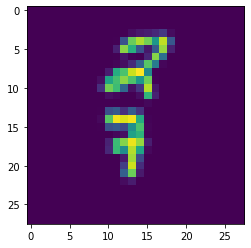

In [29]:
plt.imshow(moving_mnist[0, 0])

In [37]:
example_iter = 19
example_seq = moving_mnist[:, example_iter]

i = 0

# plot the interactive animation of images
# fig = make_subplots(rows=1, cols=1)
fig = px.imshow(example_seq[i])
fig = go.FigureWidget(fig)
print(fig.data)


@interact(i=widgets.IntSlider(min=0, max=len(moving_mnist)-1, step=1, value=0))
def update_example(i):
    with fig.batch_update():
        # print(fig.data)
        fig.data[0].z = example_seq[i]
        # fig.data[0].update()

fig

(Heatmap({
    'coloraxis': 'coloraxis',
    'hovertemplate': 'x: %{x}<br>y: %{y}<br>color: %{z}<extra></extra>',
    'name': '0',
    'uid': '2c20ee2d-769d-4760-a10e-d9319a8e4a25',
    'xaxis': 'x',
    'yaxis': 'y',
    'z': array([[0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                ...,
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
}),)


interactive(children=(IntSlider(value=0, description='i', max=19), Output()), _dom_classes=('widget-interact',…

FigureWidget({
    'data': [{'coloraxis': 'coloraxis',
              'hovertemplate': 'x: %{x}<br>y: %{y}<br>c…